In [1]:
import sys, os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

# Load data

In [2]:
xh = {}

xh['world'] = np.loadtxt('f1t1-world.dat', skiprows = 1)
xh['solid'] = np.loadtxt('f1t1-solid.dat', skiprows = 1)
xh['base'] = np.loadtxt('f1t1-base.dat', skiprows = 1)
xh['eic'] = np.loadtxt('f1t1-eic.dat', skiprows = 1)

In [3]:
def corr(x, a):
    return np.exp(a*(np.abs(x-0.4)+(x-0.4))**2)

In [4]:
tol = 1.5
fac = 1.022
xval = xh['world'][:,0]
uval = xh['world'][:,1]
dval = xh['world'][:,3]
uerr_world = xh['world'][:,2] * tol + 1e-7
derr_world = xh['world'][:,4] * tol + 1e-7
uerr_solid = xh['solid'][:,2] * tol * corr(xval, 2.0) + 1e-7
derr_solid = xh['solid'][:,4] * tol * corr(xval, 2.0) + 1e-7
uerr_base = np.min([xh['base'][:,2] * fac, xh['world'][:,2]], axis=0) * tol + 1e-7
derr_base = np.min([xh['base'][:,4] * fac, xh['world'][:,4]], axis=0) * tol + 1e-7
uerr_base = xh['base'][:,2] * fac * tol * corr(xval, -1.5) + 1e-7
derr_base = xh['base'][:,4] * fac * tol * corr(xval, -0.5) + 1e-7
uerr_eic = xh['eic'][:,2] * tol + 1e-7
derr_eic = xh['eic'][:,4] * tol + 1e-7

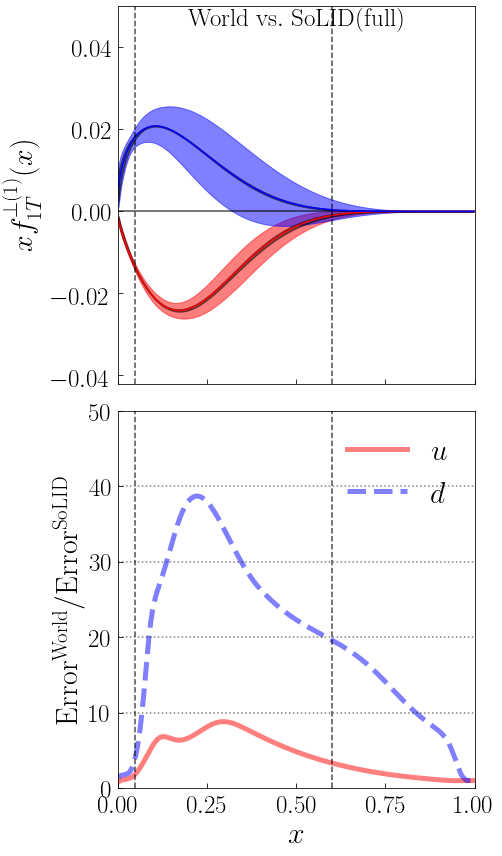

In [89]:
nrows, ncols = 2, 1

fig = plt.figure(figsize = (ncols * 7, nrows * 6))

ax = fig.add_subplot(nrows, ncols, 1)
ax.axhline(y = 0, linestyle = '-', color = 'black', alpha = 0.7)
ax.fill_between(xval, uval - uerr_world, uval + uerr_world,\
               color = 'red', alpha = 0.5)
ax.fill_between(xval, dval - derr_world, dval + derr_world,\
               color = 'blue', alpha = 0.5)
ax.fill_between(xval, uval - uerr_solid, uval + uerr_solid,\
               color = 'black', alpha = 0.5)
ax.fill_between(xval, dval - derr_solid, dval + derr_solid,\
               color = 'black', alpha = 0.5)
ax.plot(xval, uval, color = 'red', linestyle = '-')
ax.plot(xval, dval, color = 'blue', linestyle = '-')
ax.set_xlim(0,1)
ax.set_ylim(-0.042, 0.05)
ax.set_ylabel(r'$xf_{1T}^{\perp(1)}(x)$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.set_xticklabels([])
ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.text(0.5, 0.95, r'$\rm World~vs.~SoLID(full)$', transform = ax.transAxes, horizontalalignment = 'center', fontsize = 25)

ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(xval, uerr_world / uerr_solid,\
        linestyle = '-', linewidth = 5, color = 'red', alpha = 0.5, label = r'$u$')
ax.plot(xval, derr_world / derr_solid,\
        linestyle = '--', linewidth =5, color = 'blue', alpha = 0.5, label = r'$d$')
ax.set_xlim(0,1)
ax.set_ylim(0, 50)
ax.set_xlabel(r'$x$', size = 30)
ax.set_ylabel(r'$\rm Error^{World}/Error^{SoLID}$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.axhline(y = 10, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 20, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 30, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 40, linestyle = ':', color = 'black', alpha = 0.5)
ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.legend(frameon = False, loc = 'upper right', fontsize = 30)

fig.tight_layout()
fig.savefig("world-full.pdf")

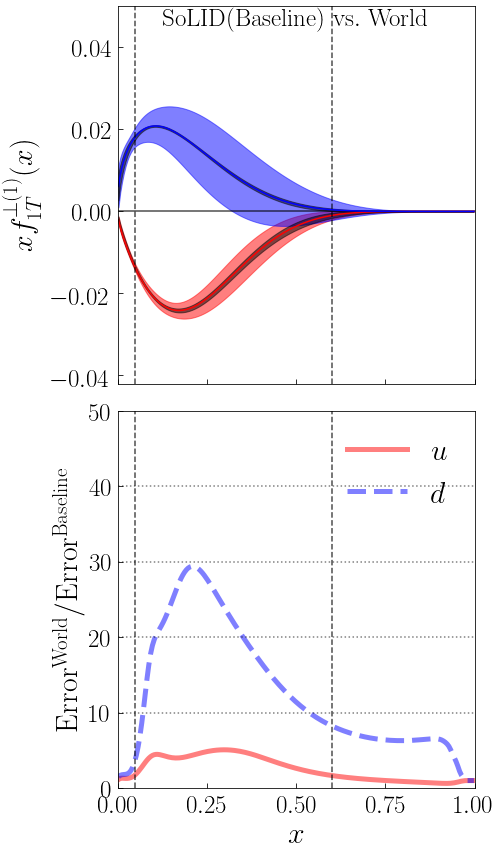

In [5]:
nrows, ncols = 2, 1
fac = 1.022
fig = plt.figure(figsize = (ncols * 7, nrows * 6))

ax = fig.add_subplot(nrows, ncols, 1)

ax.axhline(y = 0, linestyle = '-', color = 'black', alpha = 0.7)
ax.fill_between(xval, uval - uerr_world, uval + uerr_world,\
               color = 'red', alpha = 0.5)
ax.fill_between(xval, dval - derr_world, dval + derr_world,\
               color = 'blue', alpha = 0.5)
ax.fill_between(xval, uval - uerr_base, uval + uerr_base,\
               color = 'black', alpha = 0.5)
ax.fill_between(xval, dval - derr_base, dval + derr_base,\
               color = 'black', alpha = 0.5)
ax.plot(xh['world'][:,0], xh['world'][:,1], color = 'red', linestyle = '-')
ax.plot(xh['world'][:,0], xh['world'][:,3], color = 'blue', linestyle = '-')
ax.set_xlim(0,1)
ax.set_ylim(-0.042, 0.05)
ax.set_ylabel(r'$xf_{1T}^{\perp(1)}(x)$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.set_xticklabels([])
ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.text(0.5, 0.95, r'$\rm SoLID(Baseline)~vs.~World$', transform = ax.transAxes, horizontalalignment = 'center', fontsize = 25)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(xval, uerr_world / uerr_base,\
        linestyle = '-', linewidth = 5, color = 'red', alpha = 0.5, label = r'$u$')
ax.plot(xval, derr_world / derr_base,\
        linestyle = '--', linewidth =5, color = 'blue', alpha = 0.5, label = r'$d$')
ax.set_xlim(0,1)
ax.set_ylim(0, 50)
ax.set_xlabel(r'$x$', size = 30)
ax.set_ylabel(r'$\rm Error^{World}/Error^{Baseline}$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.axhline(y = 10, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 20, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 30, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 40, linestyle = ':', color = 'black', alpha = 0.5)
ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.legend(frameon = False, loc = 'upper right', fontsize = 30)


fig.tight_layout()
fig.savefig("sivers-world-base.pdf")

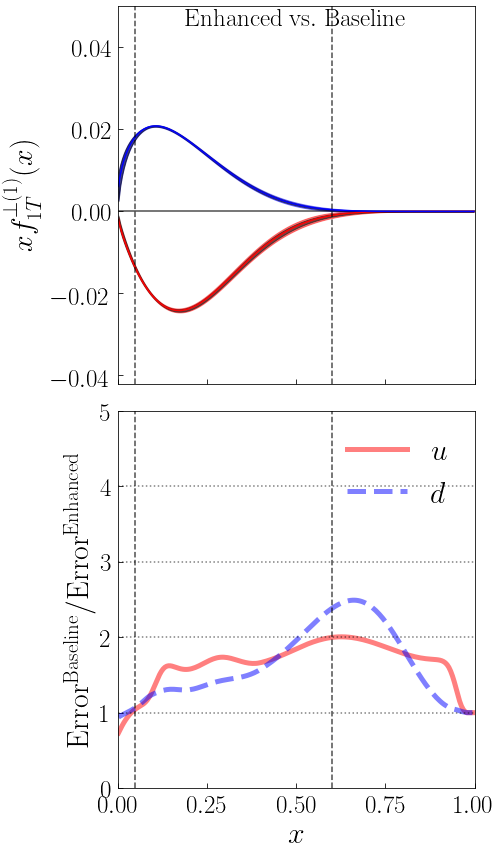

In [6]:
nrows, ncols = 2, 1
tol = 1.5
fac = 1.022
fig = plt.figure(figsize = (ncols * 7, nrows * 6))

ax = fig.add_subplot(nrows, ncols, 1)

ax.axhline(y = 0, linestyle = '-', color = 'black', alpha = 0.7)
ax.fill_between(xval, uval - uerr_base, uval + uerr_base,\
               color = 'red', alpha = 0.5)
ax.fill_between(xval, dval - derr_base, dval + derr_base,\
               color = 'blue', alpha = 0.5)
ax.fill_between(xval, uval - uerr_solid, uval + uerr_solid,\
               color = 'black', alpha = 0.5)
ax.fill_between(xval, dval - derr_solid, dval + derr_solid,\
               color = 'black', alpha = 0.5)
ax.plot(xval, uval, color = 'red', linestyle = '-')
ax.plot(xval, dval, color = 'blue', linestyle = '-')
ax.set_xlim(0,1)
ax.set_ylim(-0.042, 0.05)
ax.set_ylabel(r'$xf_{1T}^{\perp(1)}(x)$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.set_xticklabels([])
ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.text(0.5, 0.95, r'$\rm Enhanced~vs.~Baseline$', transform = ax.transAxes, horizontalalignment = 'center', fontsize = 25)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(xval, uerr_base / uerr_solid,\
        linestyle = '-', linewidth = 5, color = 'red', alpha = 0.5, label = r'$u$')
ax.plot(xval, derr_base / derr_solid,\
        linestyle = '--', linewidth =5, color = 'blue', alpha = 0.5, label = r'$d$')
ax.set_xlim(0,1)
ax.set_ylim(0, 5)
ax.set_xlabel(r'$x$', size = 30)
ax.set_ylabel(r'$\rm Error^{Baseline}/Error^{Enhanced}$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.axhline(y = 1, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 2, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 3, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 4, linestyle = ':', color = 'black', alpha = 0.5)
ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.legend(frameon = False, loc = 'upper right', fontsize = 30)


fig.tight_layout()
fig.savefig("sivers-base-enhanced.pdf")

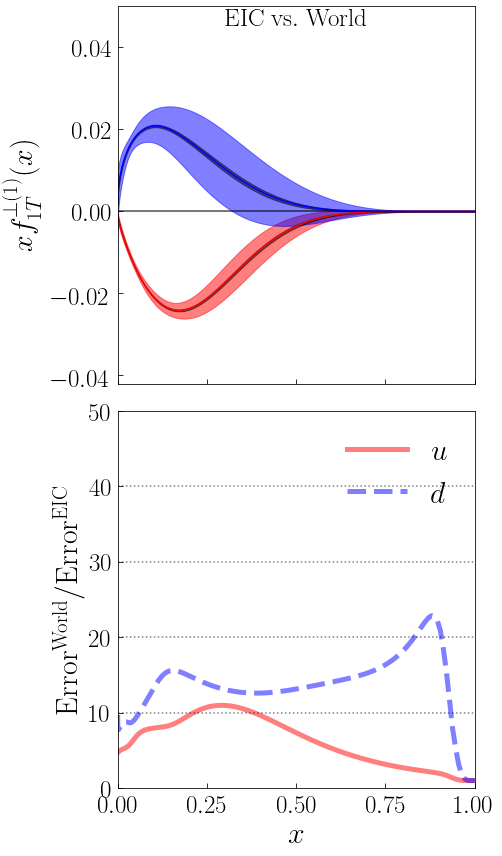

In [5]:
nrows, ncols = 2, 1

fig = plt.figure(figsize = (ncols * 7, nrows * 6))

ax = fig.add_subplot(nrows, ncols, 1)

ax.axhline(y = 0, linestyle = '-', color = 'black', alpha = 0.7)
ax.fill_between(xval, uval - uerr_world, uval + uerr_world,\
               color = 'red', alpha = 0.5)
ax.fill_between(xval, dval - derr_world, dval + derr_world,\
               color = 'blue', alpha = 0.5)
ax.fill_between(xval, uval - uerr_eic, uval + uerr_eic,\
               color = 'black', alpha = 0.5)
ax.fill_between(xval, dval - derr_eic, dval + derr_eic,\
               color = 'black', alpha = 0.5)
ax.plot(xh['world'][:,0], xh['world'][:,1], color = 'red', linestyle = '-')
ax.plot(xh['world'][:,0], xh['world'][:,3], color = 'blue', linestyle = '-')
ax.set_xlim(0,1)
ax.set_ylim(-0.042, 0.05)
ax.set_ylabel(r'$xf_{1T}^{\perp(1)}(x)$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.set_xticklabels([])
#ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
#ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.text(0.5, 0.95, r'$\rm EIC~vs.~World$', transform = ax.transAxes, horizontalalignment = 'center', fontsize = 25)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(xval, uerr_world / uerr_eic,\
        linestyle = '-', linewidth = 5, color = 'red', alpha = 0.5, label = r'$u$')
ax.plot(xval, derr_world / derr_eic,\
        linestyle = '--', linewidth =5, color = 'blue', alpha = 0.5, label = r'$d$')
ax.set_xlim(0,1)
ax.set_ylim(0, 50)
ax.set_xlabel(r'$x$', size = 30)
ax.set_ylabel(r'$\rm Error^{World}/Error^{EIC}$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.axhline(y = 10, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 20, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 30, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 40, linestyle = ':', color = 'black', alpha = 0.5)
#ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
#ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.legend(frameon = False, loc = 'upper right', fontsize = 30)


fig.tight_layout()
fig.savefig("sivers-world-eic.pdf")

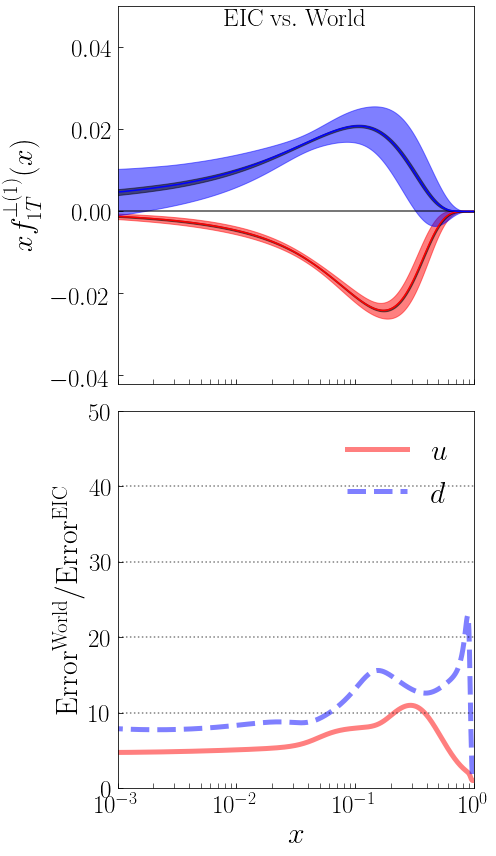

In [6]:
nrows, ncols = 2, 1

fig = plt.figure(figsize = (ncols * 7, nrows * 6))

ax = fig.add_subplot(nrows, ncols, 1)

ax.axhline(y = 0, linestyle = '-', color = 'black', alpha = 0.7)
ax.fill_between(xval, uval - uerr_world, uval + uerr_world,\
               color = 'red', alpha = 0.5)
ax.fill_between(xval, dval - derr_world, dval + derr_world,\
               color = 'blue', alpha = 0.5)
ax.fill_between(xval, uval - uerr_eic, uval + uerr_eic,\
               color = 'black', alpha = 0.5)
ax.fill_between(xval, dval - derr_eic, dval + derr_eic,\
               color = 'black', alpha = 0.5)
ax.plot(xh['world'][:,0], xh['world'][:,1], color = 'red', linestyle = '-')
ax.plot(xh['world'][:,0], xh['world'][:,3], color = 'blue', linestyle = '-')
ax.set_xlim(1e-3,1)
ax.set_ylim(-0.042, 0.05)
ax.set_xscale('log')
ax.set_ylabel(r'$xf_{1T}^{\perp(1)}(x)$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.set_xticklabels([])
#ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
#ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.text(0.5, 0.95, r'$\rm EIC~vs.~World$', transform = ax.transAxes, horizontalalignment = 'center', fontsize = 25)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(xval, uerr_world / uerr_eic,\
        linestyle = '-', linewidth = 5, color = 'red', alpha = 0.5, label = r'$u$')
ax.plot(xval, derr_world / derr_eic,\
        linestyle = '--', linewidth =5, color = 'blue', alpha = 0.5, label = r'$d$')
ax.set_xlim(1e-3,1)
ax.set_ylim(0, 50)
ax.set_xscale('log')
ax.set_xlabel(r'$x$', size = 30)
ax.set_ylabel(r'$\rm Error^{World}/Error^{EIC}$', size = 30)
ax.tick_params(axis = 'both', which = 'both', direction = 'in', length = 5, pad = 6, labelsize = 25)
ax.axhline(y = 10, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 20, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 30, linestyle = ':', color = 'black', alpha = 0.5)
ax.axhline(y = 40, linestyle = ':', color = 'black', alpha = 0.5)
#ax.axvline(x = 0.05, linestyle = '--', color = 'black', alpha = 0.7)
#ax.axvline(x = 0.6, linestyle = '--', color = 'black', alpha = 0.7)
ax.legend(frameon = False, loc = 'upper right', fontsize = 30)


fig.tight_layout()
fig.savefig("sivers-world-eic-log.pdf")